# Customer Segmentation Using RFM

Objective:

1. Identify the Country that have most frequent transaction
2. Identify the product that most likely sold, et cetera
3. Identify the price of the top product
4. Determine the last transaction of each customers
5. Determine the count of transaction conducted by each customers
6. Determine the money spend of each customers
7. Create segmentation based on their last transaction, frequency, and the money that they spend 

# Import Module

In [1]:
import pandas as pd # data processing, read data
import numpy as np # linear algebra

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt # time module

# Import Data

In [2]:
df = pd.read_csv('sales_transaction.csv')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [44]:
df.shape

(536295, 7)

# Data Preparation

In [50]:
df.isnull().sum() # missing values

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [3]:
df.dropna(axis=0, inplace=True)

In [5]:
df.dtypes # column type

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object

In [4]:
df.drop(['TransactionNo', 'ProductNo'], axis= 1, inplace=True)
df.head()

,Date,ProductName,Price,Quantity,CustomerNo,Country
0,12/9/2019,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,12/9/2019,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,12/9/2019,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,12/9/2019,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,12/9/2019,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [5]:
df['CustomerNo'] = df['CustomerNo'].astype(int) 

In [6]:
df['Date'] = pd.DatetimeIndex(df['Date']).date

In [169]:
df.head()

,Date,ProductName,Price,Quantity,CustomerNo,Country
0,2019-12-09,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom
1,2019-12-09,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom
2,2019-12-09,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom
3,2019-12-09,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom
4,2019-12-09,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom


In [7]:
df[df['ProductName'] == 'Assorted Tutti Frutti Round Box']

,Date,ProductName,Price,Quantity,CustomerNo,Country
491333,2019-01-06,Assorted Tutti Frutti Round Box,11.94,-24,15823,United Kingdom


In [8]:
df[df['Quantity'] > 10000]

,Date,ProductName,Price,Quantity,CustomerNo,Country
142,2019-12-09,Paper Craft Little Birdie,12.38,80995,16446,United Kingdom
41367,2019-11-25,Asstd Design 3d Paper Stickers,6.19,12540,13256,United Kingdom
473985,2019-01-18,Medium Ceramic Top Storage Jar,11.32,74215,12346,United Kingdom


In [9]:
df = df[df['Quantity'] < 10000]

In [10]:
df[df['Quantity'] <= 0].head()

,Date,ProductName,Price,Quantity,CustomerNo,Country
1616,2019-12-09,Paper Craft Little Birdie,6.19,-80995,16446,United Kingdom
1617,2019-12-09,Victorian Glass Hanging T-Light,6.19,-12,14397,United Kingdom
1618,2019-12-09,Zinc T-Light Holder Stars Small,6.04,-11,14397,United Kingdom
1619,2019-12-09,Victorian Sewing Box Large,6.19,-5,15311,United Kingdom
1620,2019-12-09,Hanging Heart Jar T-Light Holder,6.19,-1,17315,United Kingdom


In [11]:
df = df[df['Quantity'] >= 0]

In [12]:
df['Monetary'] = df['Price'] * df['Quantity']
df.head()

,Date,ProductName,Price,Quantity,CustomerNo,Country,Monetary
0,2019-12-09,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,257.64
1,2019-12-09,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom,383.40
2,2019-12-09,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom,138.36
3,2019-12-09,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom,127.80
4,2019-12-09,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom,71.64


# Explatory Data Analysis

Text(0, 0.5, 'Number of Transaction')

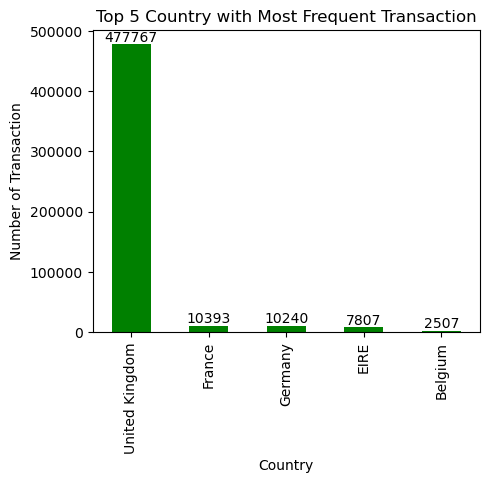

In [13]:
fig = plt.figure(figsize=(5,4), dpi= 100)
ax = df['Country'].value_counts().head().plot(kind='bar', color='g')
for c in ax.containers:
    ax.bar_label(c)
ax.set_title('Top 5 Country with Most Frequent Transaction')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Transaction')

Text(0, 0.5, 'Quantity Ordered')

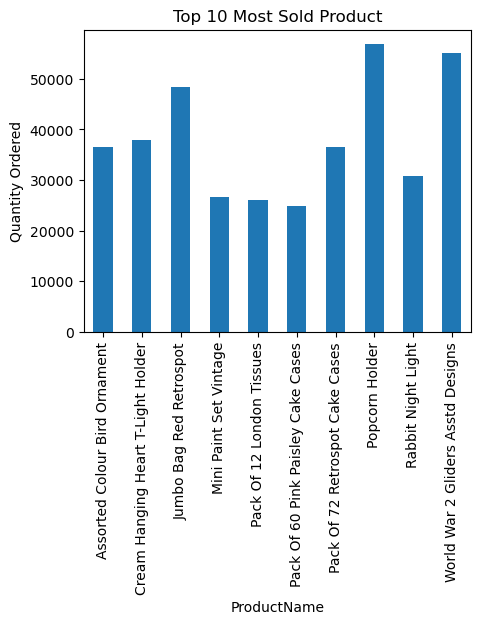

In [14]:
fig = plt.figure(figsize=(5,4), dpi= 100)
product = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index().sort_values('ProductName')
ax = product.groupby('ProductName')['Quantity'].sum().plot(kind='bar')
ax.set_title('Top 10 Most Sold Product')
ax.set_ylabel('Quantity Ordered')

Text(0, 0.5, 'Price ($)')

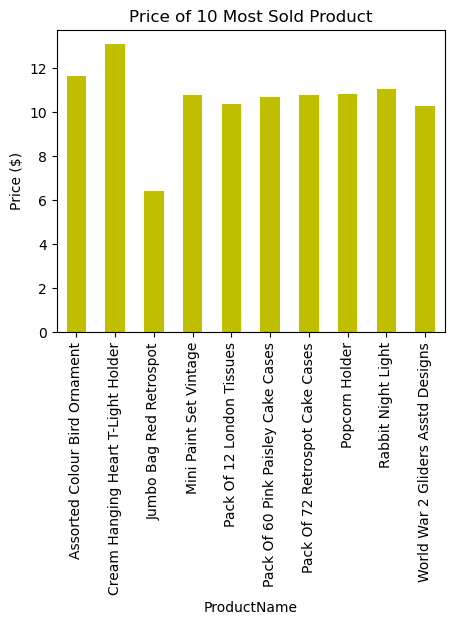

In [16]:
top_product = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()['ProductName']
list_top_product = [i for i in top_product]

fig = plt.figure(figsize=(5,4), dpi= 100)
ax = df[df['ProductName'].isin(list_top_product)].groupby('ProductName')['Price'].mean().plot(kind='bar', color='y')
ax.set_title('Price of 10 Most Sold Product')
ax.set_ylabel('Price ($)')

In [214]:
df_product = df[df['ProductName'].isin(list_top_product)]
product_grouped = df_product.groupby('ProductName')
quantity = df_product.groupby('ProductName').sum()['Quantity']
price = df_product.groupby('ProductName').mean()['Price']
product = [i for i, df in product_grouped]

C:\Users\ASUS\AppData\Local\Temp/ipykernel_7912/1162993229.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation='vertical', size=10)


Text(0, 0.5, 'Price Each ($)')

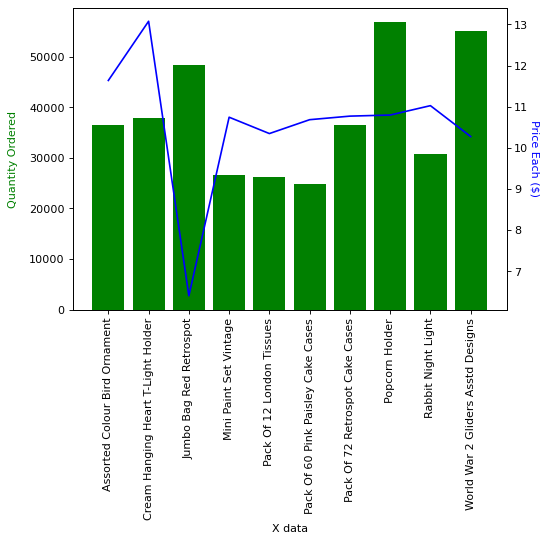

In [215]:
fig, ax1 = plt.subplots(figsize=(7, 5), dpi=80)
ax2 = ax1.twinx()
ax1.bar(product, quantity, color='g', width=0.8)
ax2.plot(product, price, 'b-')
ax1.set_xlabel('X data')
ax1.set_xticklabels(product, rotation='vertical', size=10)
ax1.set_ylabel('Quantity Ordered', color='g', rotation = 90, labelpad = 10)
ax2.set_ylabel('Price Each ($)', color='b', rotation = 270, labelpad = 10)

# RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

 - RECENCY (R): Days since last purchase
 - FREQUENCY (F): Total number of purchases
 - MONETARY VALUE (M): Total money this customer spent.

# Recency

In [17]:
df['Date'].min()

datetime.date(2018, 12, 1)

In [18]:
df['Date'].max()

datetime.date(2019, 12, 9)

In [19]:
date_now = dt.date(2019, 12, 10)

In [20]:
df_recency = df.groupby(['CustomerNo'])['Date'].max().reset_index()
df_recency.columns = ['CustomerNo', 'LastPuchaseDate']
df_recency.head()

,CustomerNo,LastPuchaseDate
0,12004,2019-04-26
1,12006,2019-05-05
2,12008,2019-03-08
3,12013,2018-12-15
4,12024,2019-06-16


In [21]:
df_recency['Recency'] = df_recency['LastPuchaseDate'].apply(lambda x: (date_now - x).days)
df_recency.drop('LastPuchaseDate', axis= 1, inplace=True)

In [22]:
df_recency.head()

,CustomerNo,Recency
0,12004,228
1,12006,219
2,12008,277
3,12013,360
4,12024,177


<AxesSubplot:xlabel='Recency', ylabel='Count'>

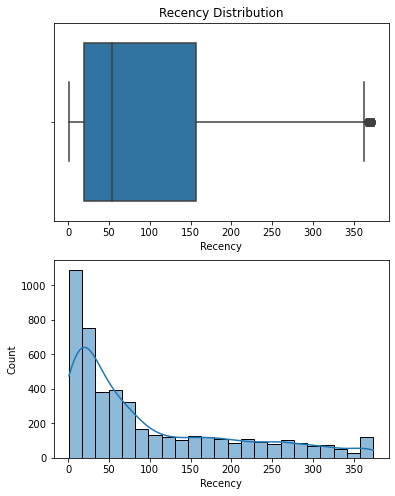

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(6,8))
ax[0].set_title('Recency Distribution')
sns.boxplot(x = df_recency['Recency'], ax= ax[0])
sns.histplot(df_recency, x='Recency', kde=True, ax=ax[1])

# Frequency

Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [44]:
df_frequency = df.groupby('CustomerNo').size().reset_index()
df_frequency.columns = ['CustomerNo', 'Frequency']
df_frequency.head()

,CustomerNo,Frequency
0,12004,56
1,12006,1
2,12008,203
3,12013,1
4,12024,5


<AxesSubplot:xlabel='Frequency', ylabel='Count'>

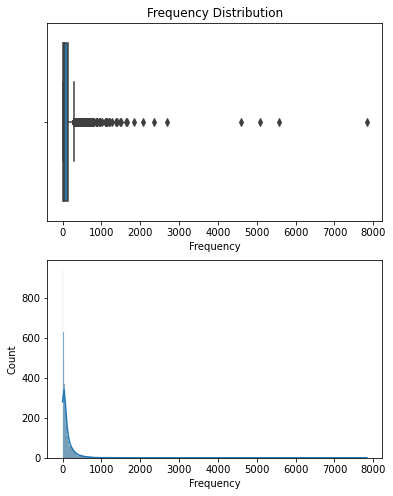

In [46]:
fig, ax = plt.subplots(2, 1, figsize=(6,8))
ax[0].set_title('Frequency Distribution')
sns.boxplot(x = df_frequency['Frequency'], ax= ax[0])
sns.histplot(df_frequency, x='Frequency', kde=True, ax=ax[1])

# Monetary

Monetary attribute answers the question: How much money did the customer spent over time?

In [49]:
df_monetary = df.groupby('CustomerNo')['Monetary'].sum().reset_index()
df_monetary.head()

,CustomerNo,Monetary
0,12004,1509.60
1,12006,24.76
2,12008,5689.57
3,12013,69.96
4,12024,149.52


In [55]:
df_monetary.sort_values('Monetary', ascending=False).head().set_index('CustomerNo')

,Monetary
CustomerNo,
14646,2112282.03
14911,914633.52
12415,900545.54
18102,897137.36
17450,891438.53


In [57]:
df_monetary.sort_values('Monetary', ascending=True).head().set_index('CustomerNo')

,Monetary
CustomerNo,
16937,5.97
13775,11.53
12810,11.98
14435,12.38
12309,12.86


# Create RFM Table

In [58]:
df_tmp = df_recency.merge(df_frequency) #merge recency dataframe with frequency dataframe
df_rfm = df_tmp.merge(df_monetary).set_index('CustomerNo') #merge again with monetary

In [59]:
df_rfm.head(10)

,Recency,Frequency,Monetary
CustomerNo,,,
12004,228,56,1509.60
12006,219,1,24.76
12008,277,203,5689.57
12013,360,1,69.96
12024,177,5,149.52
12025,288,46,1021.59
12026,340,409,20486.32
12031,71,7,136.18
12042,265,223,6296.77


# Check RFM table validation

In [62]:
df[df['CustomerNo'] == 12024]	 # 5 frequency

,Date,ProductName,Price,Quantity,CustomerNo,Country,Monetary
309301,2019-06-16,Vintage Caravan Gift Wrap,10.68,4,12024,United Kingdom,42.72
309302,2019-06-16,Wrap Green Pears,10.68,1,12024,United Kingdom,10.68
309303,2019-06-16,Wrap Monster Fun,10.68,3,12024,United Kingdom,32.04
309304,2019-06-16,Wrap Red Apples,10.68,3,12024,United Kingdom,32.04
309305,2019-06-16,Wrap Cowboys,10.68,3,12024,United Kingdom,32.04


In [63]:
df[df['CustomerNo'] == 12006]	# 1 frequency, 24.76 monetary

,Date,ProductName,Price,Quantity,CustomerNo,Country,Monetary
362925,2019-05-05,Jumbo Storage Bag Skulls,12.38,2,12006,United Kingdom,24.76


# Build customer segments with RFM Model

The simplest way to create customers segments from RFM Model is to use ** Tertiles**. We assign a score from 1 to 3 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

# RFM Tertiles

In [66]:
tertile = df_rfm.quantile([0.33, 0.66])
tertile.to_dict()

{'Recency': {0.33: 26.0, 0.66: 99.0},
 'Frequency': {0.33: 27.0, 0.66: 90.0},
 'Monetary': {0.33: 2552.4955, 0.66: 8474.128}}

In [67]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = tertiles dict)
def RScore(x,p,d): # function for Recency
    if x <= d[p][0.33]:
        return 3
    elif x <= d[p][0.66]:
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, d = tertiles dict)
def FMScore(x,p,d): # function for Frequency and Monetary
    if x <= d[p][0.33]:
        return 1
    elif x <= d[p][0.66]:
        return 2
    else:
        return 3

In [68]:
rfm_segmentation = df_rfm
rfm_segmentation['R_Tertile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',tertile,))
rfm_segmentation['F_Tertile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',tertile,))
rfm_segmentation['M_Tertile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',tertile,))

In [69]:
rfm_segmentation['RFM_Score'] = rfm_segmentation.R_Tertile.map(str) \
                            + rfm_segmentation.F_Tertile.map(str) \
                            + rfm_segmentation.M_Tertile.map(str)

In [70]:
rfm_segmentation.head(10)

,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score
CustomerNo,,,,,,,
12004,228,56,1509.60,1,2,1,121
12006,219,1,24.76,1,1,1,111
12008,277,203,5689.57,1,3,2,132
12013,360,1,69.96,1,1,1,111
12024,177,5,149.52,1,1,1,111
12025,288,46,1021.59,1,2,1,121
12026,340,409,20486.32,1,3,3,133
12031,71,7,136.18,2,1,1,211
12042,265,223,6296.77,1,3,2,132


In [71]:
segment_name = {'112':'ABOUT TO SLEEP',
                '113':'ABOUT TO SLEEP', 
                '121':'ABOUT TO SLEEP',

                '122':'ABOUT TO SLEEP',
                '131':'ABOUT TO SLEEP', 
                '211':'ABOUT TO SLEEP',

                '212':'ABOUT TO SLEEP',
                '221':'ABOUT TO SLEEP', 

                '311':'RECENT CUSTOMER',
                '312':'RECENT CUSTOMER', 
                '313':'RECENT CUSTOMER',

                '123':'CANNOT LOOSE THEM',
                '132':'CANNOT LOOSE THEM', 
                '133':'CANNOT LOOSE THEM',

                '333':'CHAMPION',
                '111':'LOST CUSTOMER',

                '233':'LOYAL',
                '323':'LOYAL', 
                '332':'LOYAL',

                '223':'POTENTIAL LOYALIST',
                '223':'POTENTIAL LOYALIST', 
                '322':'POTENTIAL LOYALIST',
                '331':'POTENTIAL LOYALIST',

                '213':'AVERAGE',
                '222':'AVERAGE', 
                '231':'AVERAGE',
                '321':'AVERAGE'}

In [72]:
rfm_segmentation["segment_name"] = rfm_segmentation["RFM_Score"].map(segment_name)

In [73]:
rfm_segmentation.head(10)

,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score,segment_name
CustomerNo,,,,,,,,
12004,228,56,1509.60,1,2,1,121,ABOUT TO SLEEP
12006,219,1,24.76,1,1,1,111,LOST CUSTOMER
12008,277,203,5689.57,1,3,2,132,CANNOT LOOSE THEM
12013,360,1,69.96,1,1,1,111,LOST CUSTOMER
12024,177,5,149.52,1,1,1,111,LOST CUSTOMER
12025,288,46,1021.59,1,2,1,121,ABOUT TO SLEEP
12026,340,409,20486.32,1,3,3,133,CANNOT LOOSE THEM
12031,71,7,136.18,2,1,1,211,ABOUT TO SLEEP
12042,265,223,6296.77,1,3,2,132,CANNOT LOOSE THEM


In [77]:
round(rfm_segmentation[['segment_name']].value_counts() / len(rfm_segmentation[['segment_name']]) * 100, 2)

segment_name      
ABOUT TO SLEEP        25.02
CHAMPION              14.86
LOST CUSTOMER         14.02
LOYAL                 13.38
AVERAGE                9.29
POTENTIAL LOYALIST     8.76
CANNOT LOOSE THEM      6.32
RECENT CUSTOMER        5.36
dtype: float64

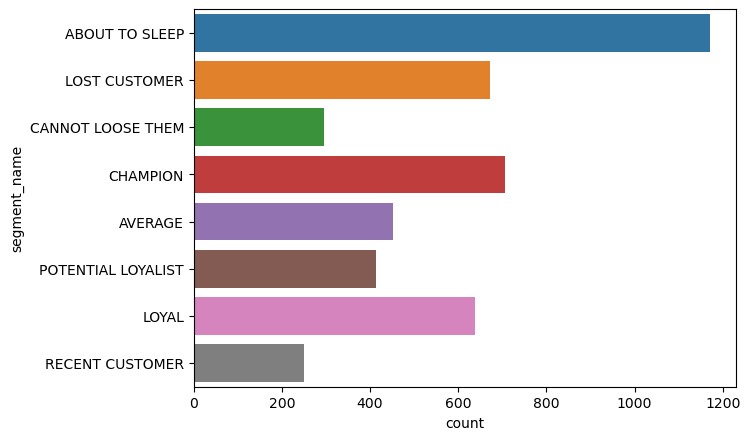

In [29]:
fig = plt.figure(figsize=(7,5), dpi= 100)
ax = sns.countplot(y="segment_name", data=rfm_segmentation)

- The majority of our customers were segmented in "About To Sleep" almost about 25% of our total customers

In [83]:
round(rfm_segmentation.groupby('segment_name')['Monetary'].sum() / sum(rfm_segmentation['Monetary']) * 100,2)

segment_name
ABOUT TO SLEEP         6.78
AVERAGE                4.19
CANNOT LOOSE THEM      5.89
CHAMPION              53.98
LOST CUSTOMER          1.12
LOYAL                 19.86
POTENTIAL LOYALIST     5.74
RECENT CUSTOMER        1.11
Name: Monetary, dtype: float64

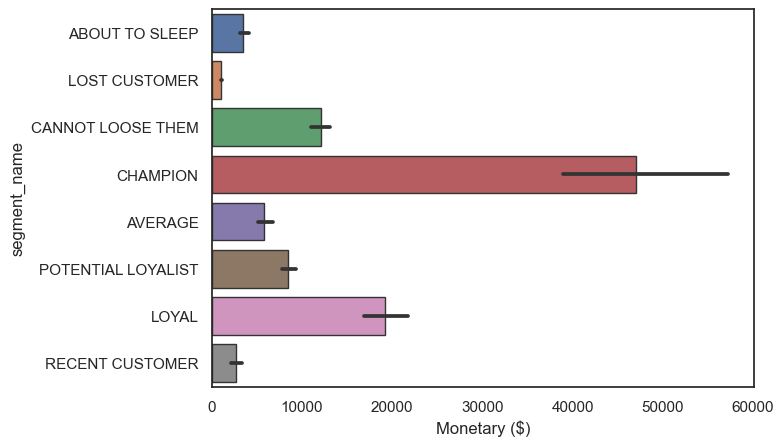

In [80]:
fig = plt.figure(figsize=(7,5), dpi= 100)
sns.set(style='white')

sns.barplot(x = "Monetary", y = "segment_name", data = rfm_segmentation ,
                 errcolor=".2", edgecolor=".2")
plt.xlabel('Monetary ($)')  
plt.show()

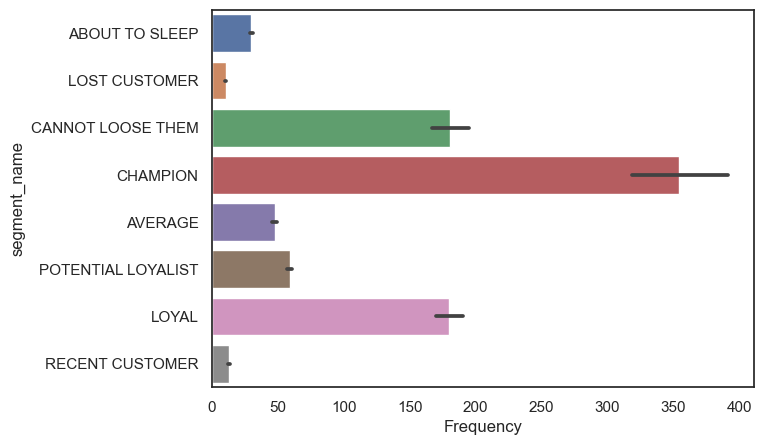

In [84]:
fig = plt.figure(figsize=(7,5), dpi= 100)
sns.set(style='white')

sns.barplot(x = "Frequency", y = "segment_name", data = rfm_segmentation)
            
plt.show()

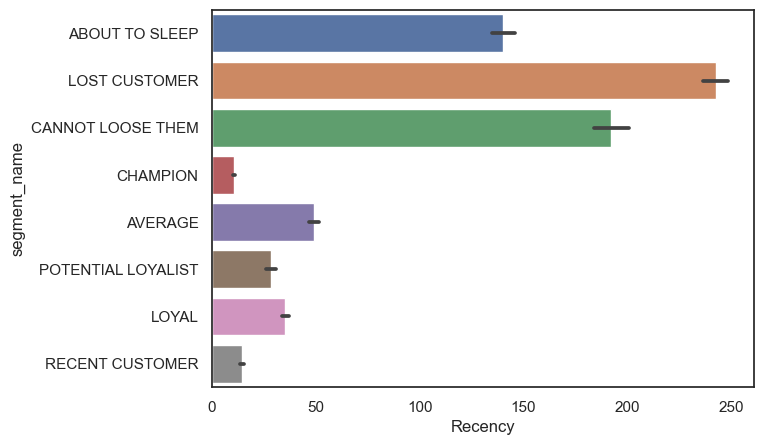

In [86]:
fig = plt.figure(figsize=(7,5), dpi= 100)
sns.set(style='white')
sns.barplot(x = "Recency", y = "segment_name", data = rfm_segmentation)     
plt.show()